Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 100)         500000    
_________________________________________________________________
dropout_1 (Dropout)          (None, None, 100)         0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, None, 64)          32064     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, None, 64)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 55)                26400     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 56        
_________________________________________________________________
activation_1 (Activation)    (None, 1)                

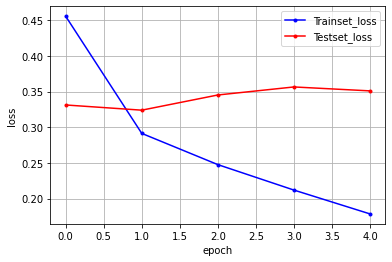

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding, Dropout, Conv1D, MaxPooling1D, Activation

import warnings
warnings.filterwarnings('ignore')

seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

# 빈도수 5000위 안에 해당하는 단어만 호출
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=5000)

# 단어 개수 100개로 제한
X_train = sequence.pad_sequences(X_train, maxlen=100)
X_test = sequence.pad_sequences(X_test, maxlen=100)

# Conv1D : Conv2D 개념을 1차원으로 변환된 함수, 컨볼루션 층과 이동 배열도 1차원
    # padding : 패딩 방법 지정, valid는 패딩 값이 없음을 의미
    # strides : 적용할 스트라이드 값으로 정수/정수의 리스트/튜플 형태로 지정, 1이 아닌 값 지정시 dilation_rate는 1 이외의 값 지정 못함
# MaxPooling1D : 2차원 배열이 1차원으로 바뀌어 정해진 구역 안에서 갖아 큰 값은 다음 층으로 넘기고 나머지는 제외
model = Sequential()
model.add(Embedding(5000, 100))
model.add(Dropout(0.5))
model.add(Conv1D(64, 5, padding='valid', activation='relu', strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(55))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
hist = model.fit(X_train, y_train, batch_size=100, epochs=5, validation_data=(X_test, y_test))

print('\nAccuracy: %.4f' % (model.evaluate(X_test, y_test)[1]))

y_loss = hist.history['loss']
y_vloss = hist.history['val_loss']

x_len = np.arange(len(y_loss))

plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()
